# Unicorn Companies
A unicorn company is a privately held company with a current valuation of over USD 1 billion. The main dataset is loaded from PowerBI, this is a merged, transformed and cleaned version of all datasets we used in our analysis. This dataset also includes Unicorns, GDP per capita, GII score, the year the Unicorn was founded, total fund raised, and Number of Patent by Country.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#install and import packages
!pip install plotly
!pip install pycountry
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import pycountry

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#load data into collab
unidata = pd.read_csv("/content/drive/Shareddrives/BUSINFO - 703/Dataset/Data Processed and to Use/Final Unicorn_V2.csv")
unidata.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Company,Country,City,Year,Date Joined Year,Deal Terms,Financial Stage,Founded Year,GII Score,GPDpercapita 2022,Industry,Investors Count,Raised Total ($B),Select Investors,Total Patent 10-22,Valuation ($B),Years To Unicorn
0,FTX,Bahamas,Bahamas,2021,2021,3.0,Acq,2018,6.0,27478.390000,Fintech,40,1.83,"Sequoia Capital, Thoma Bravo, Softbank",729.0,32.0,3
1,Afiniti,Bermuda,Hamilton,2017,2017,3.0,None,2006,6.0,118845.621104,Artificial intelligence,10,0.33,GAM Holding,NaN,1.6,11
2,Opay,Nigeria,Lagos,2021,2021,1.0,None,2018,16.9,2184.421493,Fintech,13,0.57,"Sequoia Capital China, Source Code Capital, Re...",1702.0,2.0,3
3,Wave,Senegal,Dakar,2021,2021,NaN,None,0,19.9,1598.735991,Fintech,2,0.00,"Stripe, Founders Fund, Partech Partners",3953.0,1.7,9999
4,Ajaib,Indonesia,Jakarta,2021,2021,1.0,None,2018,27.9,4787.999308,Fintech,12,0.25,"Softbank Ventures Asia, Alpha JWC Ventures, In...",16354.0,1.0,3


# 1) Explatory Data Analysis and Plotly Visualisation



In [ ]:
# install and import necessary packages:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.75,8.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# upload data from GGDrive, file name: Unicorn CBInsight Fulllist Merged - Final.csv
data = pd.read_csv("/content/drive/Shareddrives/BUSINFO - 703/Dataset/Data Processed and to Use/Final Unicorn_V2.csv")
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Company,Country,City,Year,Date Joined Year,Deal Terms,Financial Stage,Founded Year,GII Score,GPDpercapita 2022,Industry,Investors Count,Raised Total ($B),Select Investors,Total Patent 10-22,Valuation ($B),Years To Unicorn
0,FTX,Bahamas,Bahamas,2021,2021,3.0,Acq,2018,6.0,27478.390000,Fintech,40,1.83,"Sequoia Capital, Thoma Bravo, Softbank",729.0,32.0,3
1,Afiniti,Bermuda,Hamilton,2017,2017,3.0,None,2006,6.0,118845.621104,Artificial intelligence,10,0.33,GAM Holding,NaN,1.6,11
2,Opay,Nigeria,Lagos,2021,2021,1.0,None,2018,16.9,2184.421493,Fintech,13,0.57,"Sequoia Capital China, Source Code Capital, Re...",1702.0,2.0,3
3,Wave,Senegal,Dakar,2021,2021,NaN,None,0,19.9,1598.735991,Fintech,2,0.00,"Stripe, Founders Fund, Partech Partners",3953.0,1.7,9999
4,Ajaib,Indonesia,Jakarta,2021,2021,1.0,None,2018,27.9,4787.999308,Fintech,12,0.25,"Softbank Ventures Asia, Alpha JWC Ventures, In...",16354.0,1.0,3


In [ ]:
data.info() # to gather the datatypes in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             994 non-null    object 
 1   Country             994 non-null    object 
 2   City                994 non-null    object 
 3   Year                994 non-null    int64  
 4   Date Joined Year    994 non-null    int64  
 5   Deal Terms          965 non-null    float64
 6   Financial Stage     994 non-null    object 
 7   Founded Year        994 non-null    int64  
 8   GII Score           994 non-null    float64
 9   GPDpercapita 2022   994 non-null    float64
 10  Industry            994 non-null    object 
 11  Investors Count     994 non-null    int64  
 12  Raised Total ($B)   994 non-null    float64
 13  Select Investors    994 non-null    object 
 14  Total Patent 10-22  987 non-null    float64
 15  Valuation ($B)      994 non-null    float64
 16  Years To

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## 1.1) Overview of the Data

### 1.1.1) Treemap distribution of the unicorn by industry and country


In [ ]:
# Overview of the data
fig = px.treemap(unidata,path= ["Country","Industry", "Company"],
            values="Valuation ($B)", color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The main aim of displaying a treemap in this context is to provide a visual representation of the distribution of unicorn companies based on their Country, Industry and the Unicorn's valuations.


### 1.1.2) Evaluating 15 Countries by Valuation and Number of Unicorn companies:

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# First plot to show the total Unicorn valuations of the top 15 countries
fig1 = px.bar(data.groupby("Country")["Valuation ($B)"].sum().sort_values(ascending=False)[:15],
              y='Valuation ($B)',
              labels={'Valuation ($B)': 'Valuation ($B)'},
              title='Top 15 Countries by Valuation',
              )

# Second plot is based on the number of unicorns
fig2 = px.bar(pd.DataFrame(data["Country"].value_counts()[:15]).reset_index(),
              x='index',
              y='Country',
              labels={'index': 'Country', 'Country': 'Count'},
              title='Top 15 Countries by Number of Unicorn Companies',
              )

# Create subplot to merge the two plots together
fig = make_subplots(rows=1, cols=2, subplot_titles=('Valuation ($B)', 'Count'))

# Adding plots to the subplot
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)

# Update layout of the subplot
fig.update_layout(title_text='Top 15 Countries by Valuation and Number of Unicorn Companies')

# Showing the interactive plot
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



We can clearly see that United States leads both graphs in terms of the Valuation and Number of Unicorns, followed by China in the second place.
Even though India has 59 Unicorns and United Kingdom has 39, India ranks 4th in terms of total valuation and UK ranks 3rd.

###1.1.3) Number of unicorn by Founding Year and Industry

In [ ]:
# First plot
fig1 = px.bar(data.groupby("Industry")["Valuation ($B)"].sum().sort_values(ascending=False)[:15],
              y='Valuation ($B)',
              labels={'Valuation ($B)': 'Valuation ($B)'},
              title='Top 15 Industries by Valuation',
              )

# Second plot
fig2 = px.bar(pd.DataFrame(data["Industry"].value_counts()[:15]).reset_index(),
              x='index',
              y='Industry',
              labels={'index': 'Industry', 'Industry': 'Count'},
              title='Top 15 Industries by Number of Unicorn Companies',
              )

# Create subplot
fig = make_subplots(rows=1, cols=2, subplot_titles=('Valuation ($B)', 'Count'))

# Add plots to subplot
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)

# Update layout
fig.update_layout(title_text='Top 15 Industries by Valuation and Number of Unicorn Companies')

# Show the interactive plot
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Fintech ranks the highest in terms of Valuation annd the number of Unicorns. By tapping on the individual bars you could view the valuation and counts of unicorns by industry.

### 1.1.4) Number of Unicorns each Year by Industry (2011-2022)

In [89]:
unidata_with_fyear = unidata[~unidata['Date Joined Year'].isna()] # removing all NA values

num_by_joined_year = unidata_with_fyear["Date Joined Year"].value_counts().reset_index() #counting the founding year of each unicorn
num_by_joined_year["index"] = num_by_joined_year["index"].astype(np.int64)
num_by_joined_year = num_by_joined_year[num_by_joined_year["index"] >= 1990]
num_by_joined_year.sort_values(by=["index"], inplace=True)
years = pd.DataFrame({"years" : num_by_joined_year["index"]})

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=num_by_joined_year["index"], y=num_by_joined_year["Date Joined Year"],
                          mode='lines',
                          name='lines')
              )

updatemenu = []
buttons = []

buttons.append(dict(method='update',
                        label="All industries",
                        visible=True,
                        args=[{'y':[num_by_joined_year["Date Joined Year"]],
                               'x':[num_by_joined_year["index"]],
                               'type':'scatter'},
                              {'title': "Number of unicorns in All industries since 1990"}],
                        )
                  )

for indst in unidata.Industry.unique():
    selected_industry = unidata_with_fyear[unidata_with_fyear["Industry"] == indst]
    temp_vc = selected_industry["Date Joined Year"].value_counts().reset_index()
    temp_vc["index"] = temp_vc["index"].astype(np.int64)
    temp_vc.sort_values(by=["index"], inplace=True)
    result = years.set_index('years').join(temp_vc.set_index('index'), how='left').fillna(0)
    result["Date Joined Year"] = result["Date Joined Year"].astype(int)
    buttons.append(dict(method='update',
                        label=indst,
                        visible=True,
                        args=[{'y':[result["Date Joined Year"]],
                               'x':[years["years"]],
                               'type':'scatter'},
                               {'title': f"Number of unicorns in {indst} since 1990"}],
                        )
                  )

updatemenu = [dict()]

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

fig1.update_layout(showlegend=False, updatemenus=updatemenu)
fig1.update_layout(
    title = "Number of unicorns in all industries since 2011",
    xaxis_title='Date Joined Year',
    yaxis_title='Number of Unicorns')
fig1.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## 1.2) Assessing the relationship among variables:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-53-8b8a80d70bcc>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



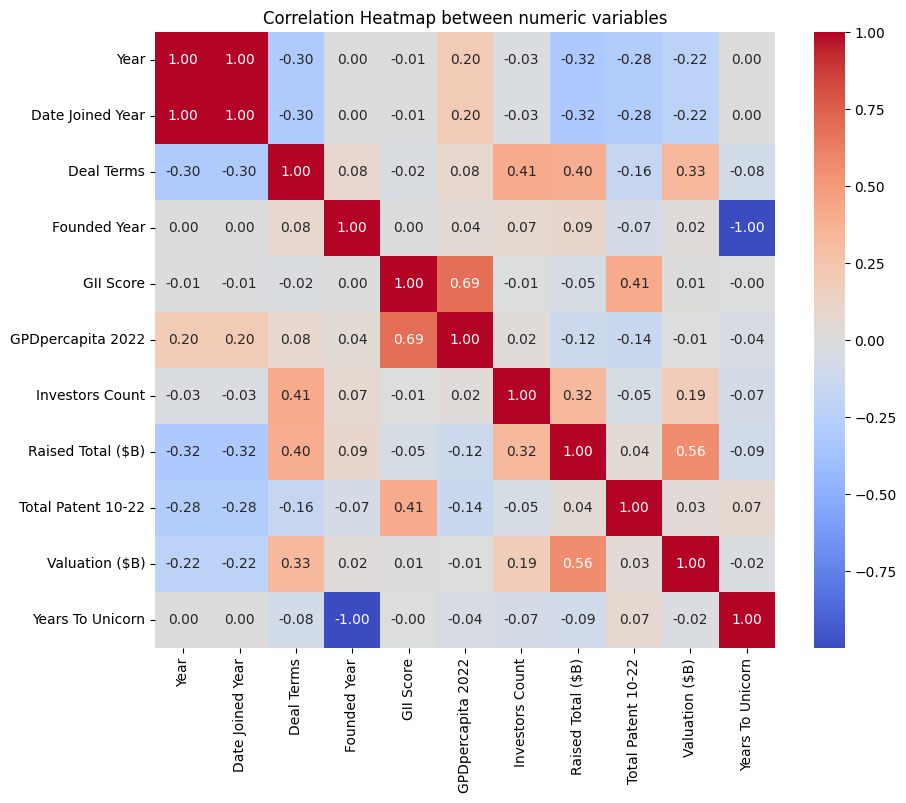

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluating the correlation among numeric variables:
corr_matrix = data.corr()
corr_matrix
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between numeric variables')
plt.show()

This code generates an interactive line plot using Plotly to visualize the number of unicorn companies joined from years 2011 to 2022 in different industries over the years.

# 2) Data Analysis with Unsupervised Machine Learning


## 2.1) Association with Apriori Methods on Investors

In [ ]:
#importing relevant packages for apriori
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#separating the 'Select Investors' into separate columns for On-hot encoding
uni_one = data['Select Investors'].str.get_dummies(sep=', ')
uni_one


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,.406 Ventures,01 Advisors,10T Fund,14W,1955 Capital,360 Capital Partners,3G Capital Management,3L,3i Group,3one4 Capital Partners,...,enaya Capital,frst,iFLYTEK,iFly,iNovia Capital,iTech Capital,iVision Ventures,index Ventures,next47,s28 Capital
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
uni_one.to_csv("Investors.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
total_per_column = uni_one.sum()


# Display the top 10 Investors
top_10_columns = total_per_column.nlargest(10)
print(top_10_columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Accel                          58
Tiger Global Management        48
Sequoia Capital China          45
Sequoia Capital                44
Andreessen Horowitz            43
Insight Partners               39
General Catalyst               32
Lightspeed Venture Partners    31
SoftBank Group                 31
General Atlantic               27
dtype: int64


In [ ]:
uni_table = (uni_one > 0).astype(int) # This one sets all 1+ values to True & convert it to 1
uni_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,.406 Ventures,01 Advisors,10T Fund,14W,1955 Capital,360 Capital Partners,3G Capital Management,3L,3i Group,3one4 Capital Partners,...,enaya Capital,frst,iFLYTEK,iFly,iNovia Capital,iTech Capital,iVision Ventures,index Ventures,next47,s28 Capital
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#converting the dataframe into True/False format
uni_final=(uni_table > 0)
uni_final

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,.406 Ventures,01 Advisors,10T Fund,14W,1955 Capital,360 Capital Partners,3G Capital Management,3L,3i Group,3one4 Capital Partners,...,enaya Capital,frst,iFLYTEK,iFly,iNovia Capital,iTech Capital,iVision Ventures,index Ventures,next47,s28 Capital
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Determining the minimum support threshold
min_support = 0.002
# Generating frequent itemsets
frequent_itemsets = apriori(uni_final, min_support=min_support, use_colnames=True)
frequent_itemsets.sort_values(by=['support'], ascending=[False])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
11,0.058350,(Accel)
346,0.048290,(Tiger Global Management)
294,0.045272,(Sequoia Capital China)
293,0.044266,(Sequoia Capital)
31,0.043260,(Andreessen Horowitz)
...,...,...
260,0.002012,(Plug and Play Ventures)
254,0.002012,(Partech Partners)
253,0.002012,(Paradigm)
251,0.002012,(PSG)


545 itemsets are generated with a minimum support threshold of 0.002.

In [ ]:
min_confidence = 0.5  # Minimum confidence threshold

#Determining rules for apriori with minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)
rules.sort_values(by=['confidence'], ascending=[False]) #arranging rules based on confidence in descending order

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
53,"(Canaan Partners, Accel)",(Qualcomm Ventures),0.002012,0.012072,0.002012,1.0,82.833333,0.001988,inf,0.989919
78,"(Flint Capital, Two Sigma Ventures)",(Commerce Ventures),0.002012,0.004024,0.002012,1.0,248.500000,0.002004,inf,0.997984
76,(China Media Group),(Guangzhou Huiyin Aofeng Equity Investment Fun...,0.002012,0.002012,0.002012,1.0,497.000000,0.002008,inf,1.000000
75,(Guangzhou Huiyin Aofeng Equity Investment Fund),"(China Media Group, Shunwei Capital Partners)",0.002012,0.002012,0.002012,1.0,497.000000,0.002008,inf,1.000000
74,"(China Media Group, Shunwei Capital Partners)",(Guangzhou Huiyin Aofeng Equity Investment Fund),0.002012,0.002012,0.002012,1.0,497.000000,0.002008,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
64,(Temasek Holdings),"(SoftBank Group, Andreessen Horowitz)",0.004024,0.003018,0.002012,0.5,165.666667,0.002000,1.993964,0.997980
37,(Matrix Partners India),(SoftBank Group),0.004024,0.031187,0.002012,0.5,16.032258,0.001887,1.937626,0.941414
55,"(Sequoia Capital, Y Combinator)",(Accel),0.004024,0.058350,0.002012,0.5,8.568966,0.001777,1.883300,0.886869
54,(Canaan Partners),"(Qualcomm Ventures, Accel)",0.004024,0.003018,0.002012,0.5,165.666667,0.002000,1.993964,0.997980


106 rules were generated after setting the minimum confidence threshold to 0.5

In [ ]:
# Let us compile a final list with some filter, calculation & sorting
final_rules=rules[(rules['lift']>1)&(rules['support']>=0.002)&(rules['confidence']>=0.5)]
# Determine number of items in X => predicting number of items in Y
final_rules=final_rules.copy() # this step creates an independent list instead of a view on rules from above
# We capture the number of items in the list of each antecedent/consequent set using 'len' function for each row
final_rules['antecedent_count']=final_rules['antecedents'].apply(len)
final_rules['consequent_count']=final_rules['consequents'].apply(len) #X

# Apply some rounding and sorting on Lift and Confidence
final_rules=round(final_rules,3).sort_values(by=['lift', 'confidence'], ascending=[False, False])

# Preserving relevant columns only
final_rules=final_rules[['antecedents', 'antecedent_count', 'consequents', 'consequent_count', 'support', 'confidence', 'lift']]
final_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,antecedent_count,consequents,consequent_count,support,confidence,lift
11,(Guangzhou Huiyin Aofeng Equity Investment Fund),1,(China Media Group),1,0.002,1.000,497.000
12,(China Media Group),1,(Guangzhou Huiyin Aofeng Equity Investment Fund),1,0.002,1.000,497.000
20,(Fifty Years Fund),1,(Refactor Capital),1,0.002,1.000,497.000
21,(Refactor Capital),1,(Fifty Years Fund),1,0.002,1.000,497.000
46,(Uniqa Ventures),1,(Speedinvest),1,0.002,1.000,497.000
...,...,...,...,...,...,...,...
27,(Gaorong Capital),1,(Sequoia Capital China),1,0.002,0.667,14.726
41,(SIG Asia Investments),1,(Sequoia Capital China),1,0.002,0.667,14.726
6,(Temasek Holdings),1,(Andreessen Horowitz),1,0.002,0.500,11.558
2,(Canaan Partners),1,(Accel),1,0.002,0.500,8.569


In [ ]:
# Loop through the DataFrame - first 10 rows
for index, row in final_rules.head(10).iterrows():
    # Antecedents & Consequents are a special data type called frozenset - we extract it into a list & then a concatenated string
    antecedents = ' & '.join(list(row['antecedents']))
    consequents = ' & '.join(list(row['consequents']))

    # Form a statement using the content from the row to create statements for top 10 rows.
    rule_statement = f"If {antecedents} invests in a company, then {consequents} is {row['confidence'] * 100:.2f}% likely to invest - this is {row['lift']:.2f} times more likely than random chance."

# Print the statements for top 10 rules
    print(rule_statement)

If Guangzhou Huiyin Aofeng Equity Investment Fund invests in a company, then China Media Group is 100.00% likely to invest - this is 497.00 times more likely than random chance.
If China Media Group invests in a company, then Guangzhou Huiyin Aofeng Equity Investment Fund is 100.00% likely to invest - this is 497.00 times more likely than random chance.
If Fifty Years Fund invests in a company, then Refactor Capital is 100.00% likely to invest - this is 497.00 times more likely than random chance.
If Refactor Capital invests in a company, then Fifty Years Fund is 100.00% likely to invest - this is 497.00 times more likely than random chance.
If Uniqa Ventures invests in a company, then Speedinvest is 100.00% likely to invest - this is 497.00 times more likely than random chance.
If Speedinvest invests in a company, then Uniqa Ventures is 100.00% likely to invest - this is 497.00 times more likely than random chance.
If Guangzhou Huiyin Aofeng Equity Investment Fund & Shunwei Capital Pa

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



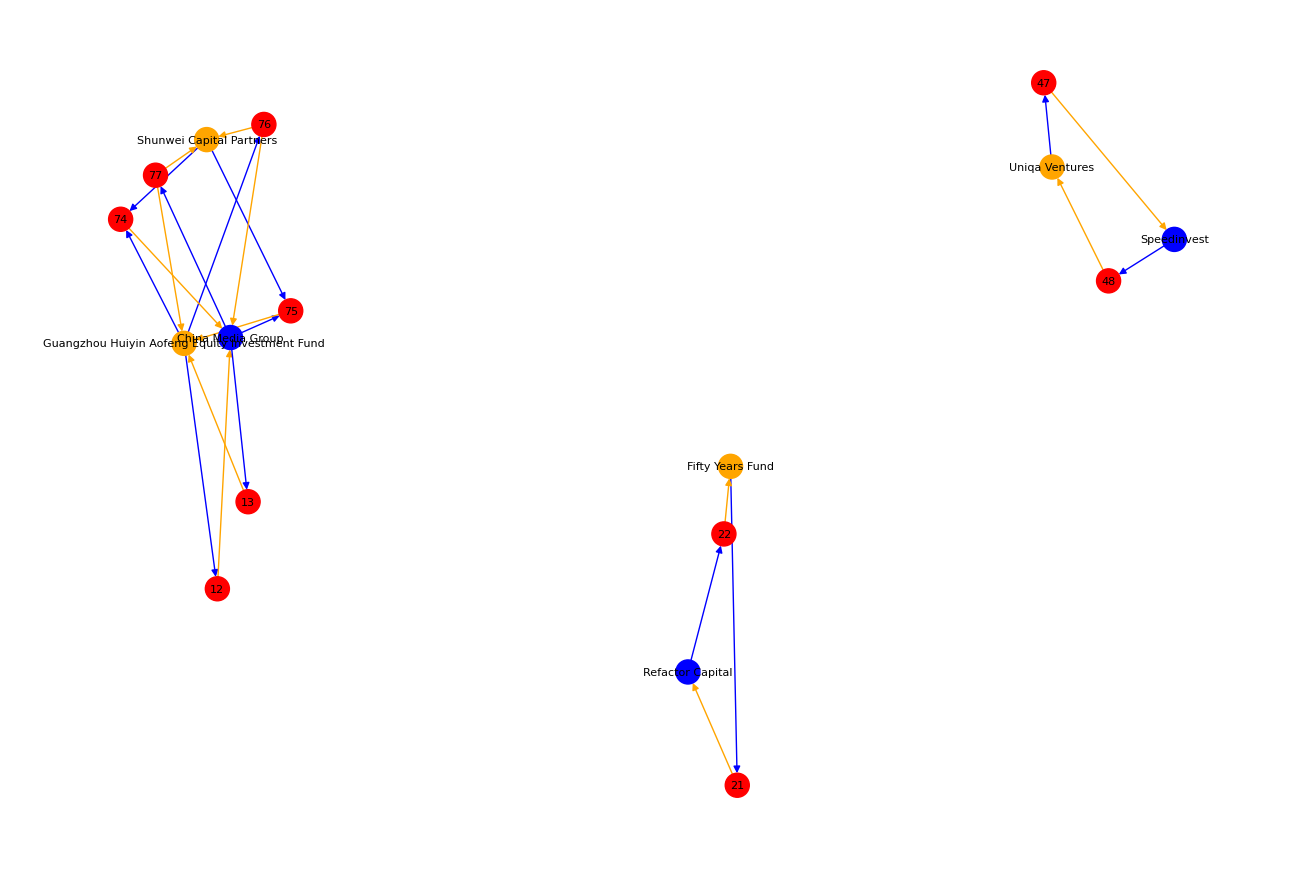

In [ ]:
#Visualising apriori results for top 10 rules
import networkx as nx
import matplotlib.pyplot as plt

# Creating a DiGraph
G = nx.DiGraph()

# Adding nodes and edges to the graph with color attributes for the top 10 rules
for i, row in final_rules.head(10).iterrows():
    for antecedent in row['antecedents']:
        G.add_node(antecedent, color='blue')
        G.add_edge(antecedent, f"R_{i + 1}", color='blue')
    for consequent in row['consequents']:
        G.add_node(consequent, color='orange')
        G.add_edge(f"R_{i + 1}", consequent, color='orange')

# Setting node colors based on 'color' attribute
node_colors = [G.nodes[node].get('color', 'red') for node in G.nodes]

# Setting edge colors based on 'color' attribute
edge_colors = [G.edges[edge].get('color', 'black') for edge in G.edges]

# Adjusting the layout algorithm
pos = nx.spring_layout(G)

# Drawing the graph
nx.draw(G, pos, with_labels=False, font_weight='bold', node_color=node_colors, edge_color=edge_colors)

# Drawing node labels with adjusted positions
node_labels = {node: node.split('_')[1] if 'R_' in node else node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='black', font_size=8)

# Displaying the graph
plt.show()



This visualisation aims to present the top 10 rules using a DiGraph. A DiGraph is a collection of nodes (vertices) and edges that connect pairs of nodes.
Each edge has a direction in a directed graph, indicating a one-way connection between two nodes. The blue nodes represent the antecedents and orange nodes represent the consequents. Edges represent the relationships or associations between antecedents and consequents in each rule.
Blue edges connect the antecedents to a rule node (e.g., "R_1," "R_2"), indicating the transition from antecedents to the association rule.
Orange edges connect the rule node to the consequents, indicating the transition from the association rule to the consequents.

Include description for Parallel coordinates plot

In [ ]:
import plotly.express as px

# Convert rules to coordinates for a parallel coordinates plot
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index
# Define coordinates and label
coords = rules[['antecedent','consequent','rule']]

top_30_coords = coords.head(30)
fig = px.scatter(top_20_coords, x="antecedent", y="consequent", color="rule",
                 color_continuous_scale=px.colors.sequential.Viridis)

fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



NameError: ignored

The directed plot seemed a little messy even for displaying top 10 rules. Hence we used this scatter plot to represent the top 20 rules. This scatter plot is used to visualise the relationships between the "antecedent" and "consequent" variables, and the color of each point is determined by the "rule" variable.

In [ ]:
import pandas as pd
import plotly.graph_objects as go

top_20_rules = final_rules.head(20).copy()

# Convert frozenset to string in both antecedents and consequents to only display Investor names
top_20_rules['antecedents'] = top_20_rules['antecedents'].apply(lambda x: ', '.join(map(str, x)))
top_20_rules['consequents'] = top_20_rules['consequents'].apply(lambda x: ', '.join(map(str, x)))

# Create a DataFrame for Sankey diagram
sankey_df = pd.DataFrame(columns=['source', 'target', 'value'])

for index, row in top_20_rules.iterrows():
    antecedents_list = str(row['antecedents']).split(', ')
    consequents_list = str(row['consequents']).split(', ')

    for antecedent in antecedents_list:
        for consequent in consequents_list:
            # Ensure the source and target are not the same
            if antecedent != consequent:
                sankey_df = pd.concat([sankey_df, pd.DataFrame({'source': [antecedent], 'target': [consequent], 'value': [row['lift']]})])

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=sankey_df['source'].append(sankey_df['target']).unique()
    ),
    link=dict(
        source=sankey_df['source'].map(lambda x: list(sankey_df['source'].unique()).index(x)),
        target=sankey_df['target'].map(lambda x: list(sankey_df['target'].unique()).index(x)),
        value=sankey_df['value']
    )
)])

# Update layout for better display
fig.update_layout(title_text="Sankey Diagram of Association Rules with Lift Values",
                  font_size=10)

# Show the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-46-57d242e3f94e>:29: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



The Sankey diagram generated by this code aims to visually represent and analyze the association rules with lift values in a clear and intuitive manner. The thickness of the nodes (both antecedents and consequents) corresponds to the number of association rules associated with each investor or item. Thicker nodes indicate stronger associations. The lift values associated with each link (arrow) indicate the strength of the association between the antecedent and consequent. Higher lift values suggest stronger relationships.

## 2.2) Cluster Analysis on Companies

In [ ]:
uni_small = data.drop(columns=['City', 'Year', 'Select Investors',
	'Deal Terms',	'Investors Count'])
uni_small.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Company,Country,Date Joined Year,Financial Stage,Founded Year,GII Score,GPDpercapita 2022,Industry,Raised Total ($B),Total Patent 10-22,Valuation ($B),Years To Unicorn
0,FTX,Bahamas,2021,Acq,2018,6.0,27478.390000,Fintech,1.83,729.0,32.0,3
1,Afiniti,Bermuda,2017,None,2006,6.0,118845.621104,Artificial intelligence,0.33,NaN,1.6,11
2,Opay,Nigeria,2021,None,2018,16.9,2184.421493,Fintech,0.57,1702.0,2.0,3
3,Wave,Senegal,2021,None,0,19.9,1598.735991,Fintech,0.00,3953.0,1.7,9999
4,Ajaib,Indonesia,2021,None,2018,27.9,4787.999308,Fintech,0.25,16354.0,1.0,3


In [ ]:
# rounding values for Raised Total
uni_small["Raised Total ($B)"] = uni_small["Raised Total ($B)"].round(5)
uni_small.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Company,Country,Date Joined Year,Financial Stage,Founded Year,GII Score,GPDpercapita 2022,Industry,Raised Total ($B),Total Patent 10-22,Valuation ($B),Years To Unicorn
0,FTX,Bahamas,2021,Acq,2018,6.0,27478.390000,Fintech,1.83,729.0,32.0,3
1,Afiniti,Bermuda,2017,None,2006,6.0,118845.621104,Artificial intelligence,0.33,NaN,1.6,11
2,Opay,Nigeria,2021,None,2018,16.9,2184.421493,Fintech,0.57,1702.0,2.0,3
3,Wave,Senegal,2021,None,0,19.9,1598.735991,Fintech,0.00,3953.0,1.7,9999
4,Ajaib,Indonesia,2021,None,2018,27.9,4787.999308,Fintech,0.25,16354.0,1.0,3


In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:

uni_small = uni_small.dropna()

# If you want to remove null values only for specific columns, you can use the subset parameter:
# uni_small = uni_small.dropna(subset=["GII Score", "GPDpercapita 2022", "Total Patent 10-22"])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#creating a new dataframe called company_counts to count the number of unicorns in each country

company_counts = uni_small['Country'].value_counts().reset_index()

# Rename the columns for clarity
company_counts.columns = ['Country', 'NumberofUnicorns']

company_counts_df = pd.DataFrame(company_counts)
company_counts_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Country,NumberofUnicorns
0,United States,518
1,China,161
2,India,59
3,United Kingdom,39
4,Germany,24


In [ ]:
merged_df = pd.merge(company_counts_df, uni_small, on='Country', how='inner')

# Select specific columns from uni_small
selected_columns = ['Country', 'NumberofUnicorns','GII Score', 'GPDpercapita 2022', 'Total Patent 10-22']

# Display the result with selected columns
result_df = merged_df.groupby('Country')[selected_columns].agg('mean').reset_index()

# Display the result
result_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-73-46a7da945822>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Country,NumberofUnicorns,GII Score,GPDpercapita 2022,Total Patent 10-22
0,Argentina,1.0,28.6,13686.008674,11781.0
1,Australia,6.0,47.1,64491.429886,155414.0
2,Austria,2.0,50.2,52131.446659,174063.0
3,Bahamas,1.0,6.0,27478.390000,729.0
4,Belgium,3.0,46.9,49582.825365,169540.0


In [ ]:
#These 3 countries had NA values for GII/GDP per capita/Total Patent, hence we have removed them for clustering
countries_to_remove = ['Bermuda', 'Hong Kong', 'Bahamas']

# Remove rows for the specified countries
result_df = result_df[~result_df['Country'].isin(countries_to_remove)]
result_df



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Country,NumberofUnicorns,GII Score,GPDpercapita 2022,Total Patent 10-22
0,Argentina,1.0,28.6,13686.008674,11781.0
1,Australia,6.0,47.1,64491.429886,155414.0
2,Austria,2.0,50.2,52131.446659,174063.0
4,Belgium,3.0,46.9,49582.825365,169540.0
5,Brazil,15.0,32.5,8917.673898,89063.0
6,Canada,18.0,50.8,54966.488836,326167.0
7,Chile,2.0,34.0,15355.506497,11028.0
8,China,161.0,55.3,12720.215640,13806414.0
9,Colombia,2.0,29.2,6630.282726,7809.0
10,Croatia,1.0,35.6,18413.234682,3944.0


In [ ]:
kmeans_df = result_df.drop('Country', axis=1)

# Display the updated result
print(kmeans_df)

    NumberofUnicorns  GII Score  GPDpercapita 2022  Total Patent 10-22
0                1.0       28.6       13686.008674             11781.0
1                6.0       47.1       64491.429886            155414.0
2                2.0       50.2       52131.446659            174063.0
4                3.0       46.9       49582.825365            169540.0
5               15.0       32.5        8917.673898             89063.0
6               18.0       50.8       54966.488836            326167.0
7                2.0       34.0       15355.506497             11028.0
8              161.0       55.3       12720.215640          13806414.0
9                2.0       29.2        6630.282726              7809.0
10               1.0       35.6       18413.234682              3944.0
11               2.0       55.9       66983.132002            164607.0
12               2.0       50.2       28332.629092              3694.0
13               2.0       56.9       50536.624467            163934.0
14    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



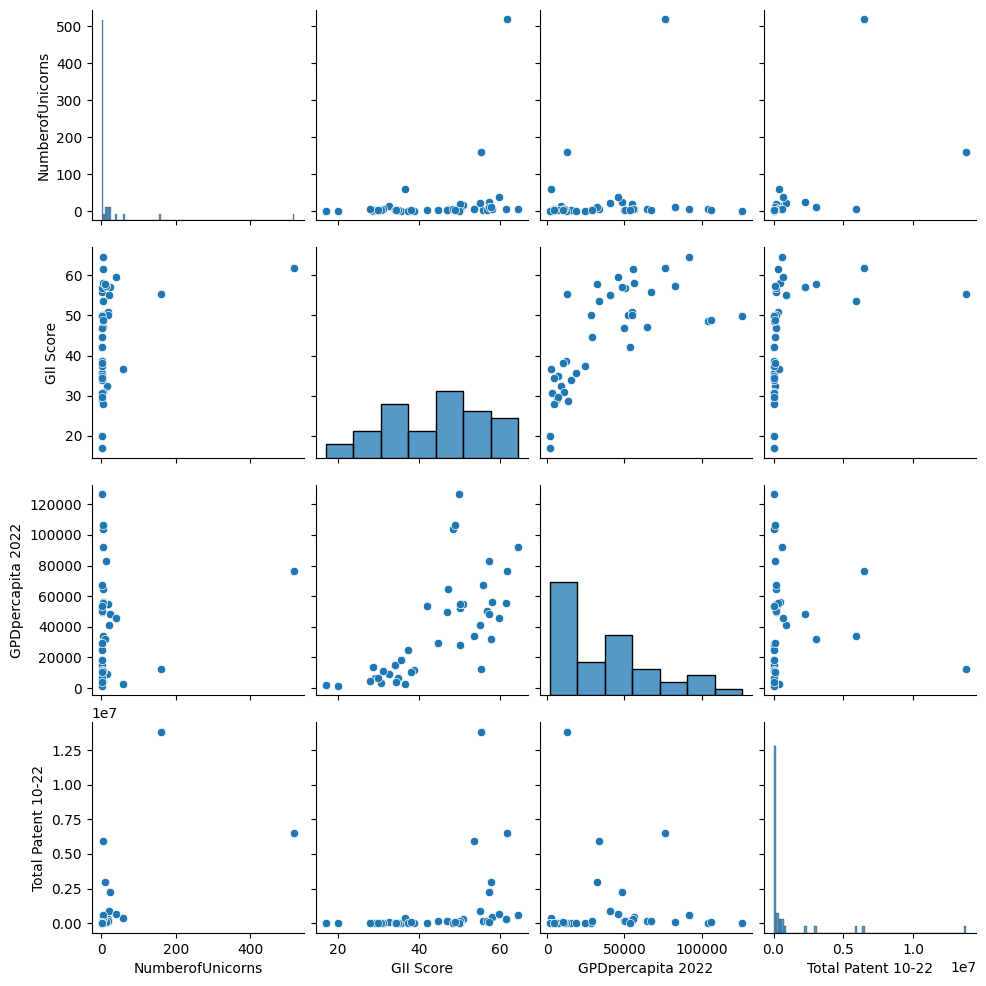

In [ ]:
# pair plot to view the relationship between the numeric variables
sns.pairplot(kmeans_df)

In [ ]:
#scaling the values for k-means
ss=StandardScaler().fit_transform(kmeans_df)
df_data_std = pd.DataFrame(ss)
df_data_std

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3
0,-0.279847,-1.288512,-0.764734,-0.359122
1,-0.219139,0.221121,0.810426,-0.301081
2,-0.267706,0.474087,0.427220,-0.293545
3,-0.255564,0.204801,0.348203,-0.295373
4,-0.109866,-0.970265,-0.912570,-0.327893
5,-0.073441,0.523048,0.515117,-0.232082
6,-0.267706,-0.847863,-0.712973,-0.359426
7,1.662795,0.890256,-0.794677,5.215127
8,-0.267706,-1.239551,-0.983488,-0.360727
9,-0.279847,-0.717300,-0.618172,-0.362288


In [ ]:
round(df_data_std.describe(),2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3
count,41.00,41.00,41.00,41.00
mean,0.00,-0.00,0.00,-0.00
std,1.01,1.01,1.01,1.01
min,-0.28,-2.24,-1.14,-0.36
25%,-0.27,-0.82,-0.86,-0.36
50%,-0.26,0.22,-0.19,-0.33
75%,-0.16,0.89,0.52,-0.23
max,6.00,1.65,2.73,5.22


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



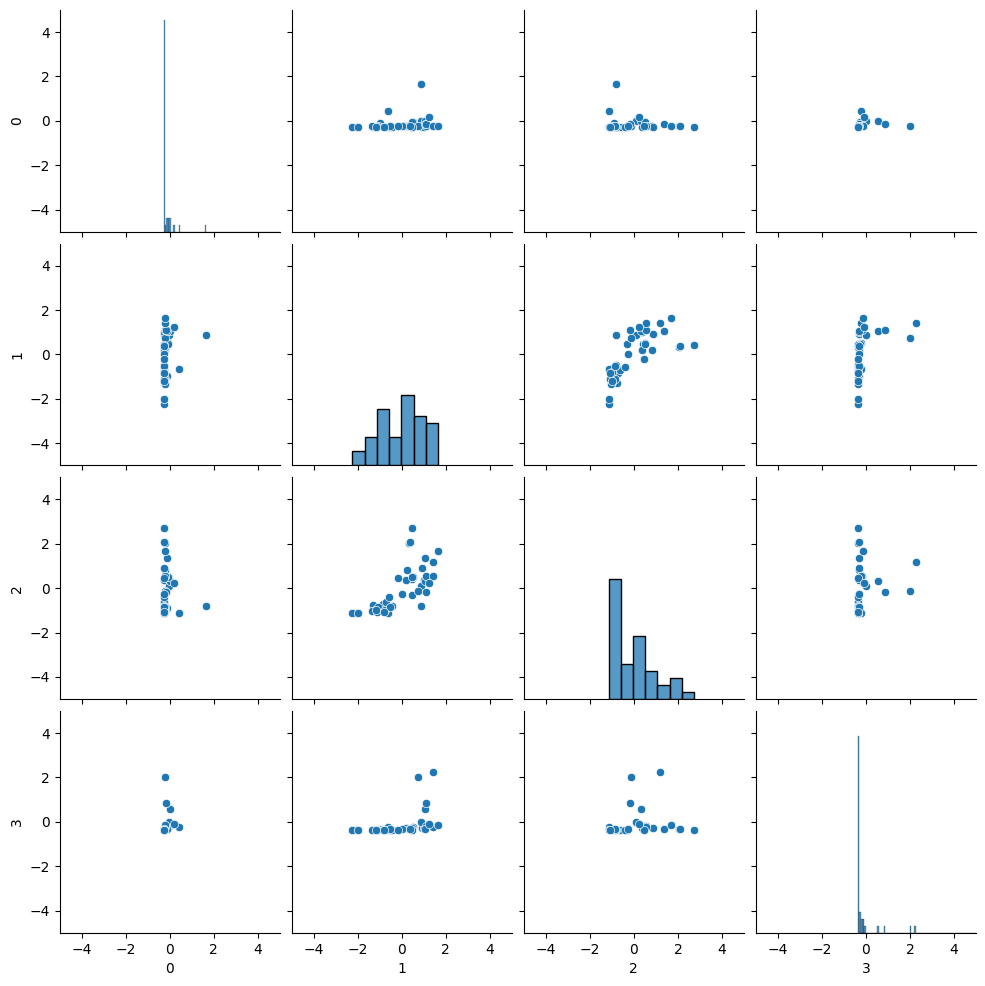

In [ ]:
# visualise - let's scale the axes to be consistent
sns.pairplot(df_data_std).set(xlim=(-5, 5), ylim=(-5, 5))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Axes: >

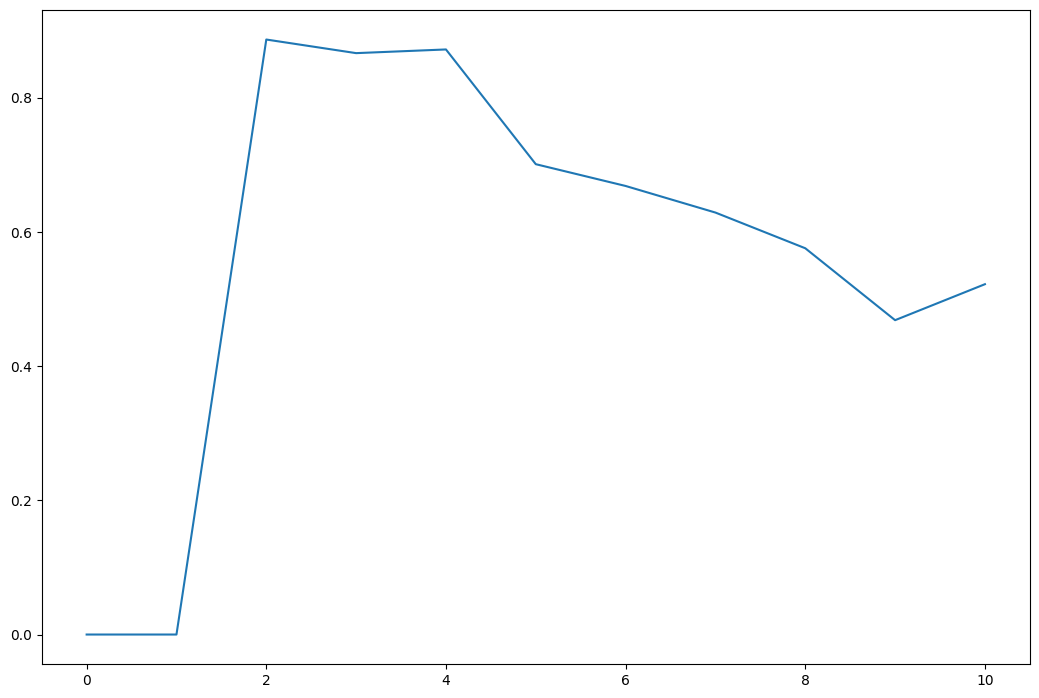

In [ ]:
#we have created a loop from 2 to 10 to view the silhouette scores
from sklearn.metrics import silhouette_score
fits_2 = [0,0]
scores_2 = [0,0]
## For each iteration, a k-means clustering model is created with the specified number of clusters
for m in range(2,11):
  model = KMeans(n_clusters = m, n_init='auto').fit(kmeans_df)
  fits_2.append(model)
  scores_2.append(silhouette_score(kmeans_df, model.labels_, metric='euclidean'))

# to plot the silhouette score
sns.lineplot(x = range(0,11), y= scores_2)

The resulting plot should show how the silhouette score changes as the number of clusters in the k-means algorithm varies, helping to identify the optimal number of clusters for the given dataset. The optimal number is 3 clusters for this dataset.

In [ ]:
kmeans = KMeans(n_clusters = 3, n_init='auto')
kmeans.fit(df_data_std)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



KMeans(n_clusters=3, n_init='auto')

In [ ]:
pd.Series(kmeans.labels_).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



2    21
0    18
1     2
dtype: int64

In [ ]:
result_df['cluster_3']=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
kmeans_df.to_csv("kmeans.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from plotly.express import scatter_3d

result_df['cluster_3'] = result_df['cluster_3'].astype(str)

fig = scatter_3d(result_df,
                 x='Total Patent 10-22',
                 y='GII Score',
                 z='GPDpercapita 2022',
                 color='cluster_3',
                 opacity=0.5,
                 size='NumberofUnicorns',
                 size_max=110,  # Adjust the size_max parameter as needed
                 hover_data=['Country']  # Include 'Country' in hover information
                )

fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



This code is creating a 3D scatter plot to visualize the relationship between three dimensions: 'Total Patent 10-22', 'GII Score', and 'GDP percapita 2022'. The data points are colored based on the 'cluster_3' column, and the size of the points is determined by the 'NumberofUnicorns' column.

In [ ]:
result_df.to_csv("clustering_final.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

